In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, median_absolute_error
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera, durbin_watson
from pmdarima import auto_arima
import scipy.stats as stats

In [14]:
# Uploading dataset
data = pd.read_csv("FTSE 100 Historical Data.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,13-09-2024,"8,239.56","8,249.99","8,263.91","8,229.28",41.82M,-0.02%
1,12-09-2024,"8,240.97","8,193.94","8,301.36","8,193.94",1.01B,0.57%
2,11-09-2024,"8,193.94","8,205.98","8,232.76","8,169.96",864.25M,-0.15%
3,10-09-2024,"8,205.98","8,270.84","8,271.12","8,195.13",814.87M,-0.78%
4,09-09-2024,"8,270.84","8,181.47","8,274.68","8,181.47",626.21M,1.09%


In [15]:
data.shape

(2949, 7)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2949 non-null   object
 1   Price     2949 non-null   object
 2   Open      2949 non-null   object
 3   High      2949 non-null   object
 4   Low       2949 non-null   object
 5   Vol.      2949 non-null   object
 6   Change %  2949 non-null   object
dtypes: object(7)
memory usage: 161.4+ KB


In [17]:
# Converting Date column
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Converting numeric columns to float
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].replace({'\,': ''}, regex=True).astype(float)

def convert_volume(vol):
    if 'M' in vol:
        return float(vol.replace('M', '').replace(',', '')) * 1e6
    elif 'B' in vol:
        return float(vol.replace('B', '').replace(',', '')) * 1e9
    return float(vol.replace(',', ''))

data['Vol.'] = data['Vol.'].apply(convert_volume)

data['Change %'] = data['Change %'].str.rstrip('%').astype(float)

print(data.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object


In [18]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [19]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2949,2949.000000,2949.000000,2949.000000,2949.000000,2.949000e+03,2949.000000
mean,2018-11-11 21:41:48.646999040,7018.971038,7018.270370,7058.172146,6978.398345,7.973018e+08,0.014710
min,2013-01-14 00:00:00,4993.890000,4993.890000,5181.040000,4898.790000,4.182000e+07,-10.870000
25%,2015-12-10 00:00:00,6612.240000,6611.940000,6647.700000,6573.960000,6.417500e+08,-0.440000
50%,2018-11-09 00:00:00,7078.040000,7077.640000,7121.930000,7037.470000,7.538100e+08,0.060000
75%,2021-10-11 00:00:00,7455.670000,7455.240000,7495.880000,7420.160000,8.872400e+08,0.490000
max,2024-09-13 00:00:00,8445.800000,8445.800000,8474.410000,8427.920000,3.880000e+09,9.050000
std,NaN,579.947036,579.753774,573.549264,587.079060,2.661834e+08,0.959472


             Price      Open      High       Low      Vol.  Change %
Price     1.000000  0.994012  0.997423  0.998020 -0.062924  0.052405
Open      0.994012  1.000000  0.997471  0.996444 -0.051582 -0.056345
High      0.997423  0.997471  1.000000  0.996856 -0.037953 -0.002051
Low       0.998020  0.996444  0.996856  1.000000 -0.078959  0.011929
Vol.     -0.062924 -0.051582 -0.037953 -0.078959  1.000000 -0.098114
Change %  0.052405 -0.056345 -0.002051  0.011929 -0.098114  1.000000


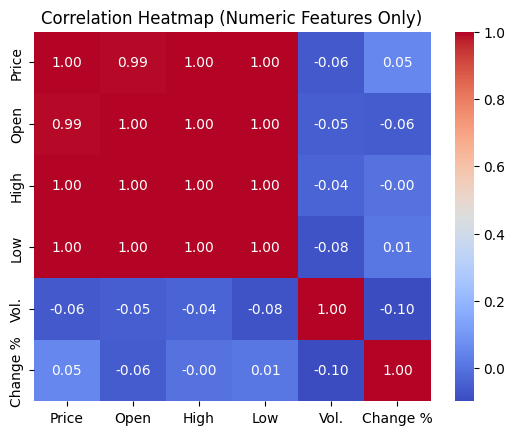

In [20]:
numeric_data= data.select_dtypes("number")
correlation_matrix= numeric_data.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [148]:
fig = px.area(x = data['Open'], y = data['High'], title='Visualising the relation between Opening and high prices')
fig.show()


In [51]:
fig = px.area(x = data['Date'], y = data['High'], title='Visualising the relation between date and high prices')
fig.show()

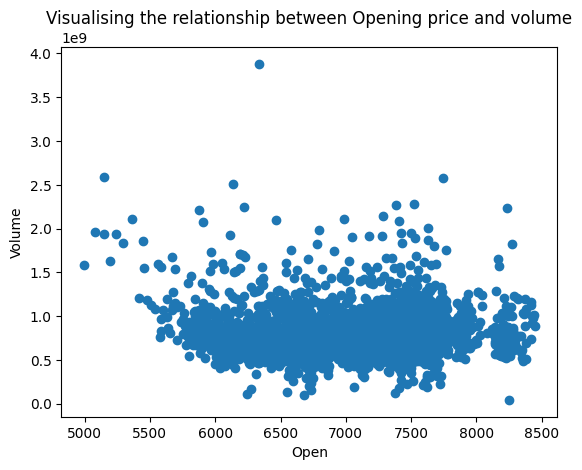

In [35]:

plt.scatter(x='Open', y= 'Vol.', data=data)
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Visualising the relationship between Opening price and volume')

# Show the plot
plt.show()

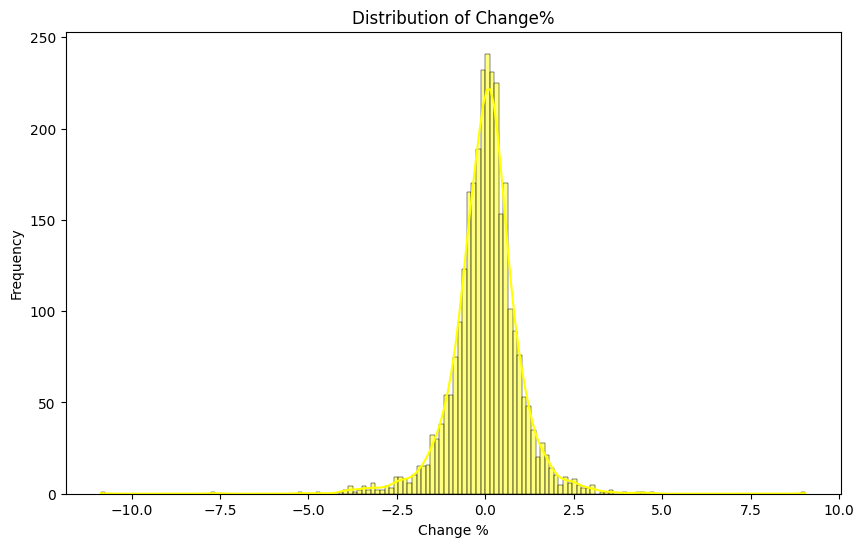

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(x=data['Change %'], color='yellow', kde=True)
plt.title('Distribution of Change%')
plt.xlabel('Change %')
plt.ylabel('Frequency')
plt.show()

In [142]:
fig = px.line( x = data['Date'] ,
              y = data['Price'],
              title = 'Visualsing the trend of prices for the stock')
fig.show()

In [132]:

fig = px.area(x = data['Price'], y = data['Vol.'], title='Visualisng price with volume of stocks in the market')

fig.show()

In [144]:
fig = px.area(x = data['Date'], y = data['Vol.'], title='Visualisng the trend for volume of stocks in the market')

fig.show()

In [25]:

fig = px.line( x = data['Date'] ,
              y = data['High'],
              title = 'Visualsing the trend in high prices of the stock')
fig.show()

In [145]:

fig = px.line( x = data['Price'] ,
              y = data['Change %'],
              title = 'Visualsing the trend in change % and price of the stock')
fig.show()


In [60]:

fig = px.violin(data, x="Open",y="Price",
                title="Visualising the relation between opening and closing prices") 
fig.show() 

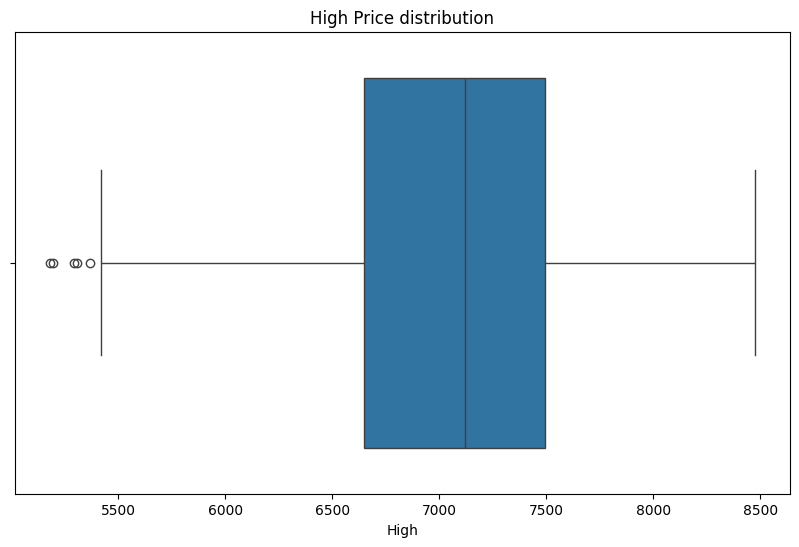

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['High'])
plt.title('High Price distribution')
plt.xlabel('High')
plt.show()


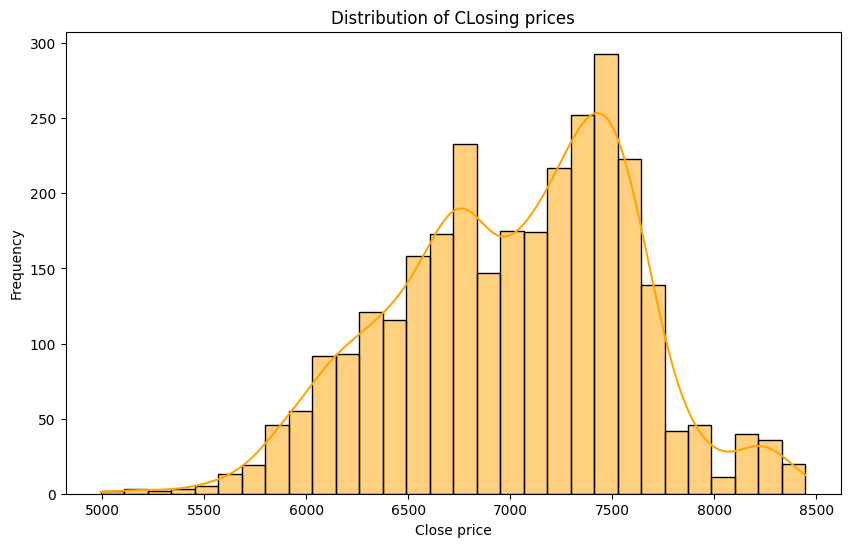

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='orange')
plt.title('Distribution of CLosing prices')
plt.xlabel('Close price')
plt.ylabel('Frequency')
plt.show()

In [76]:
# feature Selection
X= data.drop(columns=['Price', 'Date'])
y= data['Price']

In [77]:
# Standardize features 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

In [78]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [79]:
# Defining the linear model
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
predictions= reg.predict(X_test)


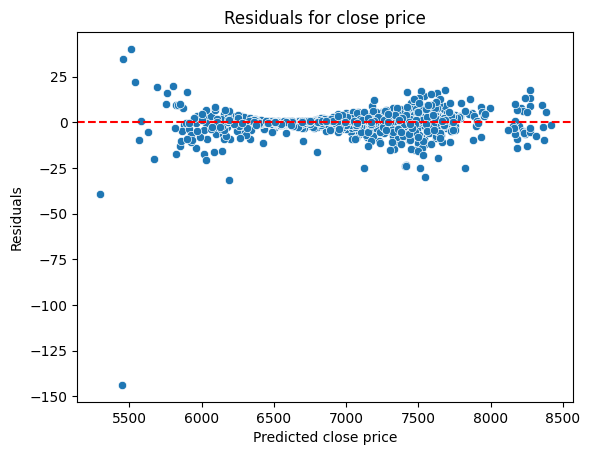

Performance evaluation of Linear regression
mean_absolute_error :  3.98470300858328
mean_absolute_percentage_error :  0.0005762948284855242
mean_squared_error:  61.554060325556264
R2 score:  0.9998170265559723


In [80]:
# Performance evaluation of Linear regression
residuals = y_test - predictions
# Residual plot for close

sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for close price')
plt.xlabel('Predicted close price')
plt.ylabel('Residuals')
plt.show()

print("Performance evaluation of Linear regression")
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, predictions))
print('mean_squared_error: ', mean_squared_error(y_test,predictions) )
print('R2 score: ' ,r2_score(y_test, predictions))

In [81]:
result = sm.OLS(y_train, X_train).fit()

In [82]:
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.471
Date:                Sat, 14 Sep 2024   Prob (F-statistic):                      0.0306
Time:                        17:31:10   Log-Likelihood:                         -21208.
No. Observations:                2064   AIC:                                  4.243e+04
Df Residuals:                    2059   BIC:                                  4.245e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
rf_model= regressor.fit(X_train, y_train)

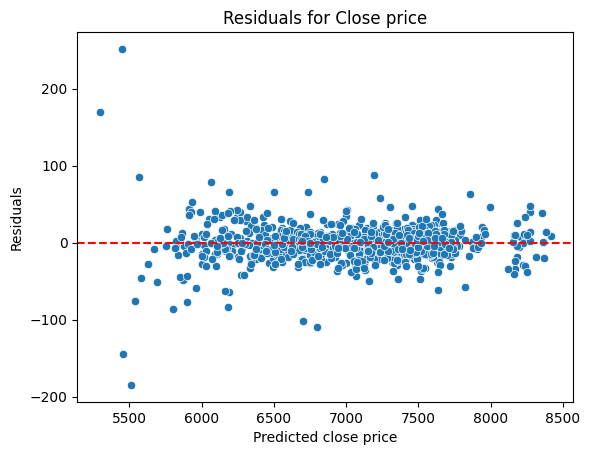

Performance Evaluation of Random forest regressor
mean_absolute_error :  15.004062146892673
mean_absolute_percentage_error :  0.002209097736682315
mean_squared_error:  567.4733271920917
R2 score:  0.9983131486611756


In [84]:
# Making predictions on the same data or new data
rf_predictions = regressor.predict(X_test)
# performance evaluation of random forest regressor
residuals = y_test - rf_predictions
# Residual plot for close

sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Close price')
plt.xlabel('Predicted close price')
plt.ylabel('Residuals')
plt.show()
print("Performance Evaluation of Random forest regressor")
print('mean_absolute_error : ', mean_absolute_error(y_test, rf_predictions)) 
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, rf_predictions))
print('mean_squared_error: ', mean_squared_error(y_test,rf_predictions) )
print('R2 score: ' ,r2_score(y_test, rf_predictions))

In [85]:
# Jarque bera test
rf_jarque = stats.jarque_bera(rf_predictions) 
print("jarque_bera test: ", rf_jarque)

#Durbin Watson test
residuals = y_test - rf_predictions
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)



jarque_bera test:  SignificanceResult(statistic=13.724585382471933, pvalue=0.001046511851514526)
Durbin-Watson statistic: 2.107301753054195


In [86]:
from sklearn.svm import SVR 
# create an SVR model with a linear kernel 
svr = SVR(kernel='rbf') 
  
# train the model on the data 
svr.fit(X_train, y_train) 
  
# make predictions on the data 
y_pred = svr.predict(X_test) 

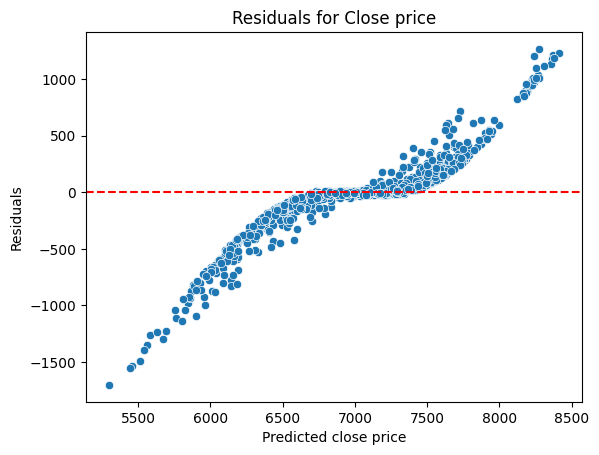

performance evaluation of SVR
mean_absolute_error:  224.03101983361546
mean_absolute_percentage_error :  0.03309806046715568
mean_squared_error:  137060.6275945169
R2 score:  0.5925783784377454


In [87]:
#performance evaluation of SVR
residuals = y_test - y_pred

# Residual plot for close price
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals for Close price')
plt.xlabel('Predicted close price')
plt.ylabel('Residuals')
plt.show()
print("performance evaluation of SVR")
print('mean_absolute_error: ', mean_absolute_error(y_test, y_pred)) 
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_pred))
print('mean_squared_error: ', mean_squared_error(y_test,y_pred) )
print('R2 score: ' ,r2_score(y_test, y_pred))


In [88]:

# Jarque bera test
svr_jarque = stats.jarque_bera(y_pred) 
print("jarque_bera test: ", svr_jarque)

#Durbin Watson test
residuals = y_test - y_pred
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)



jarque_bera test:  SignificanceResult(statistic=80.03530369077313, pvalue=4.17402095291169e-18)
Durbin-Watson statistic: 2.0757971098761905


In [89]:
# Importing the libraries for SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [109]:
# Performing stationarity tests and transformations
result = adfuller(data['Date'].diff(periods=350).dropna())
print("1. ADF : ", result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
    print("\t", key, ": ", val)

1. ADF :  -0.10927353974337121
2. P-Value :  0.9485069834905759
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2575
5. Critical Values :
	 1% :  -3.432892070219288
	 5% :  -2.86266308749922
	 10% :  -2.5673678605335093


In [110]:
#Identifying the optimal order for the SARIMAX model
import pmdarima as pm
model = pm.auto_arima(data['Date'], start_p=1, start_q=1,  m=12, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=199218.689, Time=5.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=196886.916, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=197383.956, Time=1.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=196891.118, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=200689.730, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=196888.703, Time=0.51 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=196888.703, Time=1.46 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=197819.956, Time=3.90 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=197382.597, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=196889.345, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=200413.656, Time=0.88 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 15.075 seconds


In [118]:
#Fitting the SARIMAX model to make predictions
model = SARIMAX(data['Price'], order=(1,1,1), seasonal_order=(1,0,1,12))
s_model = model.fit()
s_predicted=  s_model.predict(start=len(data), end=len(data)+30, dynamic=False)
print(s_predicted)



2949    6107.107905
2950    6109.397669
2951    6111.932710
2952    6113.129217
2953    6116.287795
2954    6115.154111
2955    6114.512296
2956    6116.601222
2957    6118.730208
2958    6115.551137
2959    6117.005639
2960    6116.888645
2961    6116.395635
2962    6118.296848
2963    6120.695053
2964    6121.662298
2965    6124.581069
2966    6123.491736
2967    6122.977570
2968    6124.798894
2969    6126.749619
2970    6123.864753
2971    6125.198018
2972    6125.068458
2973    6124.647184
2974    6126.334038
2975    6128.497881
2976    6129.352848
2977    6131.978914
2978    6130.994219
2979    6130.540325
Name: predicted_mean, dtype: float64


<Axes: >

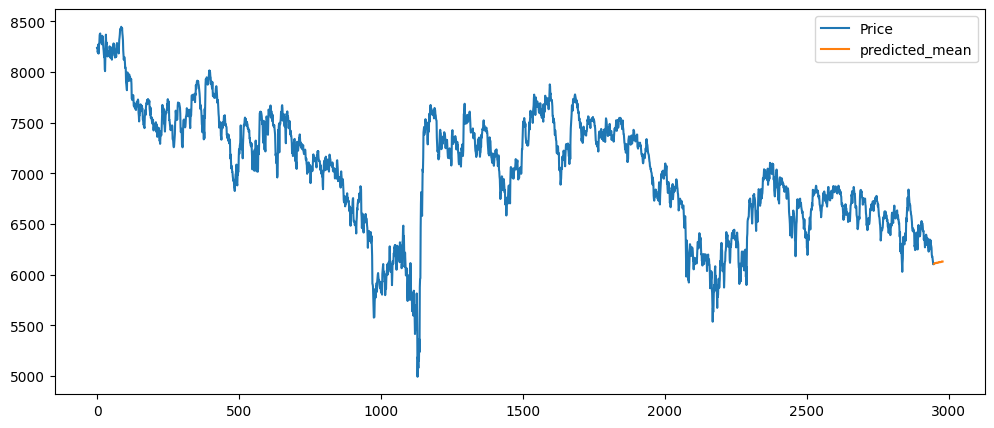

In [116]:
# Plotting the forecasted values 
data['Price'].plot(figsize = (12, 5), legend = True) 
s_predicted.plot(legend = True) 

In [113]:
s_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 2949
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -16413.884
Date:                            Sat, 14 Sep 2024   AIC                          32837.767
Time:                                    17:52:06   BIC                          32867.712
Sample:                                         0   HQIC                         32848.548
                                           - 2949                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8343      0.133     -6.278      0.000      -1.095      -0.574
ma.L1          0.8519      0.129      6.618      0.000       0.600       1.104
ar.S.L12       0.8963      0.059     15.278      0.000       0.781       1.011
ma.S.L12      -0.9194      0.054    -17.113      0.000      -1.025      -0.814
sigma2      4016.6544     50.514     79.516      0.000    3917.649    4115.660
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):              7009.72
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.70
Prob(H) (two-sided):                  0.20   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Future Predictions


In [127]:
# Generate forecasts for the future
forecast_steps = 24
forecast = s_model.forecast(steps=forecast_steps)

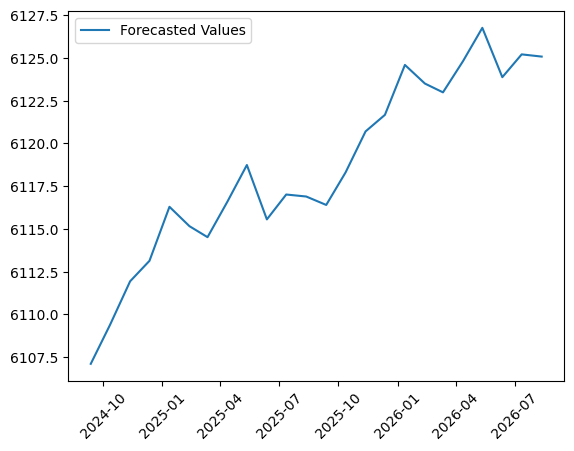

In [129]:
from pandas.tseries.offsets import DateOffset
# Creating a date range for the forecast period
forecast_dates=[data.iloc[+1]["Date"] + DateOffset(months = x) for x in range (0,24)]
# Forecast future values



plt.plot(forecast_dates,forecast, label='Forecasted Values')
plt.legend()
plt.xticks(rotation=45)
plt.show()